In [2]:
import os
import matplotlib.pyplot as plt
from skimage import io
import cv2




## Dataset

In [7]:
path_dataset = "subsetOfKylbergTextureDataset-6classes-40samples"
types = os.listdir(path_dataset)
print(types)

['canvas1', 'cushion1', 'linsseeds1', 'sand1', 'seat2', 'stone1']


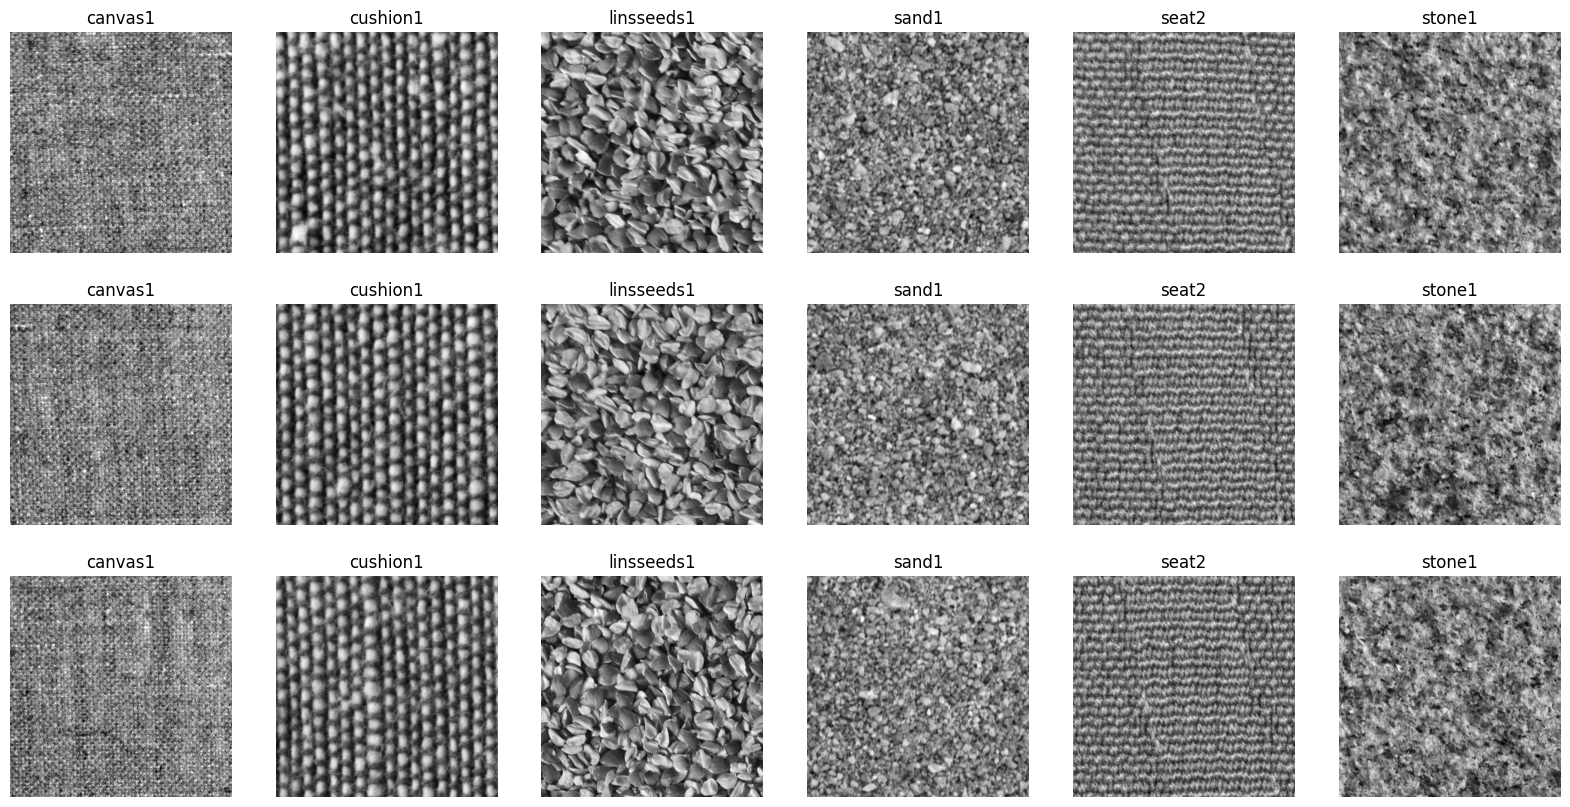

In [8]:
fig,axs = plt.subplots(3,len(types), figsize=(20,10))
for m,type_name in zip(range(len(types)),types):
    path = os.path.join(path_dataset, type_name)
    files = os.listdir(path)
    for j in range(3):
        file = path+'/'+files[j]
        axs[j,m].imshow(io.imread(file), cmap='gray')
        axs[j,m].set_title(type_name)        
        axs[j,m].axis('off')
        img = io.imread(file)
plt.show() 

In [9]:
images = []
labels = []
for m,type_name in zip(range(len(types)),types):
    path = os.path.join(path_dataset, type_name)
    files = os.listdir(path)
    for j in files:
        file = path+'/'+j
        img = cv2.imread(file,0)

        images.append(img)
        labels.append(type_name)

In [28]:
len(images)

240

In [10]:

len(labels)


240

In [37]:
from skimage.feature import greycomatrix, greycoprops, graycoprops, graycomatrix
import cv2
glcm = []
features = []

for img in images:
    #calcular la matriz de coocurrencia de la imagen
    glcm.append(graycomatrix(img, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)  )

    #calcular las features de la matriz
    l_props = [ 'contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    
    #Append list of propeties to the features
    l_features = [graycoprops(glcm[-1], i)[0,0] for  i in l_props]
    features.append(l_features)




In [38]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)



In [39]:
X_train[0]

[1907.835616729908,
 34.12737461081922,
 0.03368116250436484,
 0.00014556605909140936,
 0.012065076008521842,
 0.40327585648968034]

In [49]:
#Classify data with a decision tree
from sklearn.tree import DecisionTreeClassifier

l_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
l_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [50]:
#Predict labels for test set
l_predTest = l_clf.predict(X_test)

In [51]:
#Check classification model metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, l_predTest)

#Perfec prediction, maybe overfitting ...

array([[11,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  9]], dtype=int64)